# Méthodes numériques de résolution d'équations non linéaires $f(x)=0$
## Methode de dichotomie

Implémentons la méthode de dichotomie (ou de la bissection).

In [1]:
from math import *
def bissection(f, a, b, tol):
    niter = 0
    zero = 0.0
    res = 0.0
    err = 0.0
    inc = []
    y = (a+b)/2
    
    if f(a)*f(b)<0:
        while abs(b-a)>tol:
            x=(a+b)/2
            inc.append(abs(x-y))
            y = x
            niter += 1
            if f(a)*f(x)<=0:
                b = x
            else:
                a = x        
        zero = (a+b)/2
        res = f(zero)
        err = abs(a-b)
        return zero, res, niter, inc, err
    elif f(a)*f(b)>0:
        print("On ne peut appliquer la methode de la dichotomie sur l'intervalle [a,b]")
    else:
        if f(a)==0:
            print("Un zero de f sur [a,b] est a" + str(a))
        else:
            print("Un zero de f sur [a,b] est b" + str(b))
    

Testons la fonction bissection l’évaluation numérique de $$ \sqrt{10}.$$

In [7]:
from math import *

a = 3
b = 4
tol = 10**(-6)
def f(x):
    return x**2-10

zero, res, niter, inc, err = bissection(f, a, b, tol)
print("Une estimation d’un zero de la function : zero  = " + str(zero))
print("Le reste de la fonction au point zero : f(zero) = " + str(res))
print("Le nombre d’itérations : niter = " + str(niter))
print("Un vecteur contenant les residus a chaque iteration : inc = " + str(inc))
print("La longueur de l'intervalle final : err = " + str(err))

Une estimation d’un zero de la function : zero  = 3.1622776985168457
Le reste de la fonction au point zero : f(zero) = 2.4253699848486576e-07
Le nombre d’itérations : niter = 20
Un vecteur contenant les residus a chaque iteration : inc = [0.0, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07]
La longueur de l'intervalle final : err = 9.5367431640625e-07


# On veut résoudre l’equation $$\frac{x}{2}-\sin(x)+\frac{\pi}{6}-\frac{\sqrt{3}}{2}=0, \quad x \in [-\frac{\pi}{2}, \pi ] $$

## 1. Graphe de la fonction $$f(x)=\frac{x}{2}-\sin(x)+\frac{\pi}{6}-\frac{\sqrt{3}}{2}$$

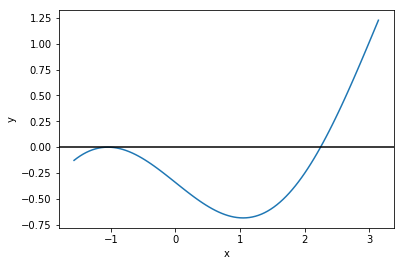

In [8]:
from matplotlib.pylab import *

def F(x):
    return x/2-sin(x)+pi/6-((3**(1/2))/2)

x = linspace(-pi/2, pi, 100)
y = F(x)
plot(x,y)
axhline(0, color='black')
xlabel('x')
ylabel('y')
show()

**Nombre de zeros de f:** f possede 2 recines sur $[-\frac{\pi}{2}, \pi ]$

**Zeros pour lesquelles on peut appliquer la dichotomie**

Nous observons qu'il y a un zero de f dans $[-\frac{\pi}{2}, 0 ]$ et un zero dans $[\frac{\pi}{2}, \pi ]$

i. $\forall x \in [-\frac{\pi}{2}, 0 ], \quad f(x) \leq 0$. Par suite, $\forall x,y \in [-\frac{\pi}{2}, 0 ], \quad f(x)f(y) \geq 0$. Par consequent on ne peut appliquer la dichotomie pour ce zero

ii. $f$ est continue sur $[\frac{\pi}{2}, \pi ]$. De plus $f(\frac{\pi}{2})f(\pi) < 0$

In [4]:
print("f(pi/2)= " + str(F(pi/2)))
print("f(pi)= " + str(F(pi)))

f(pi/2)= -0.5570284647886915
f(pi)= 1.2283696986087567


Par suite, d'après le théorème des valeurs intermédiaires, f a au moins un zéro dans l’intervalle $[\frac{\pi}{2}, \pi ]$ et on peut appliquer la methode de dichotomie

## 2. Determinons le nombre minimal d'iterations possibles pour $tol=10^{-10}$

i. D'apres la question precedente, il n'est pas possible d'appliquer la methode de dichotomie sur $I_1$

ii. $I_2 = [\frac{\pi}{2}, \pi ], \quad tol=10^{-10}.$ Soit $n$ le nombre d'itérations nécessaires pour satisfaire cette tolérance. Apres $n$ iterations, l'intervalle mesure $\frac{b-a}{2^n}$. Par suite, $n$ est telle que $\frac{b-a}{2^n} < tol$. La fonction $\ln$ etant croissante:

\begin{align}
\frac{b-a}{2^n} < tol &\Rightarrow & \ln (b-a) - \ln (2^n) < \ln (tol) \\
&\Rightarrow & n \ln 2 > \ln (b-a)-\ln (tol) \\
&\Rightarrow & n > \frac{\ln (b-a)-\ln (tol)}{\ln 2} \\
&\Rightarrow & n > \frac{\ln (\frac{\pi}{2})+10\ln (tol)}{\ln 2} \\
&\Rightarrow & n > 33.870777078 \\
\end{align}

**On conclut que le nombre minimal d'itérations nécessaires pour satisfaire la tolérance $tol=10^{-10}$ est $n=34$**

## 3. Verifions en utilisant la fonction bissection

In [5]:
from math import *

a = pi/2
b = pi
tol = 10**(-10)

zero, res, niter, inc, err = bissection(F, a, b, tol)

print("Une estimation d’un zero de la function : zero  = " + str(zero))
print("Le reste de la fonction au point zero : f(zero) = " + str(res))
print("Le nombre d’itérations : niter = " + str(niter))
print("Un vecteur contenant les residus a chaque iteration : inc = " + str(inc))
print("La longueur de l'intervalle final : err = " + str(err))

Une estimation d’un zero de la function : zero  = 2.2460055892966215
Le reste de la fonction au point zero : f(zero) = -1.5218937221561646e-12
Le nombre d’itérations : niter = 34
Un vecteur contenant les residus a chaque iteration : inc = [0.0, 0.39269908169872414, 0.19634954084936185, 0.09817477042468115, 0.049087385212340795, 0.024543692606170175, 0.012271846303085532, 0.006135923151542322, 0.003067961575771161, 0.0015339807878853584, 0.0007669903939429012, 0.0003834951969712286, 0.00019174759848583633, 9.587379924314021e-05, 4.793689962134806e-05, 2.396844981067403e-05, 1.1984224905337015e-05, 5.992112452890552e-06, 2.9960562262232315e-06, 1.4980281131116158e-06, 7.490140565558079e-07, 3.7450702849994855e-07, 1.8725351402792967e-07, 9.362675701396483e-08, 4.681337850698242e-08, 2.3406689475535813e-08, 1.1703344959812512e-08, 5.851672035817046e-09, 2.925836017908523e-09, 1.4629182309988664e-09, 7.314593375440381e-10, 3.6572966877201907e-10, 1.8286483438600953e-10, 9.143219514839984e-

**Nous avons bien $niter=34$**

## 4. Verifions que l'erreur commise satisfait la tolerance

In [6]:
x0 = 2.246005589297974 #bonne approximation
err = abs(x0-zero)
print(err<tol)

True


Soit $x_0$ une bonne approximation du zero.
On a $err=|x_0-zero|<tol$

**On conclut donc que l'erreur commise avec la solution numerique obtenue satisfait la tolerance**